# Stock Alpha Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-01-01' #input
symbol1 = '^NSEI' #input
symbol2 = 'TCS.NS' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def alpha(stocks_returns , market_returns):
    m = np.matrix([stocks_returns , market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    alpha = np.mean(stocks_returns ) - beta * np.mean(market_returns)
    return alpha

Text(0, 0.5, 'Alpha')

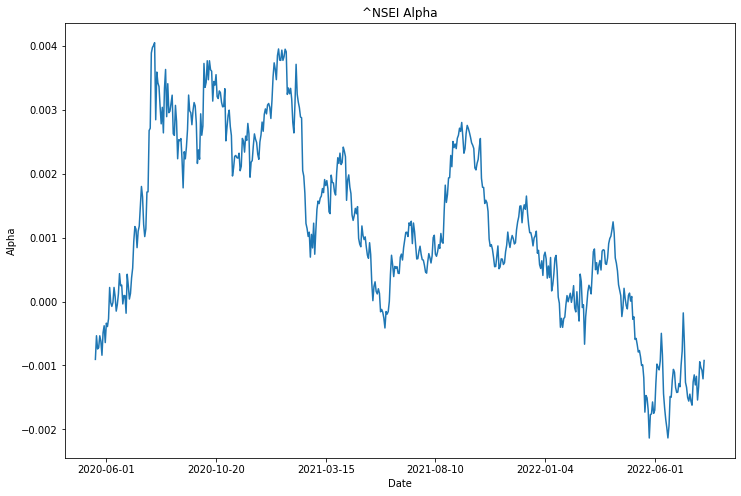

In [6]:
# Compute the running Alpha
running = [alpha(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]


# Plot running Alpha up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol1 + ' Alpha')
plt.xlabel('Date')
plt.ylabel('Alpha')